In [1]:
import OQtrl as oqt
import numpy as np


In [2]:
# 1. Create a manager object
experiment_manager = oqt.manager(boot=True)  # boot=False to prevent ADwin booting

In [3]:
# 2. Create new project
experiment_manager.create_project(name="Digital Output Examples")

In [4]:
experiment_manager['Digital Output Examples'].settings.GENERAL.DIO_CH_CONFIG = '1111'

In [5]:
experiment_manager["Digital Output Examples"]

Project | Name: Digital Output Examples, Number of Master Sequences: 0

In [6]:
# 3. Create a new master sequence
MOT_master = oqt.sequence.masterSequence(name="MOT", duration=200e-6)

In [7]:
MOT_master.settings.GENERAL.PROCESS_DELAY = int(0.1e-6 / 1e-9)

In [8]:
# 4. Setting up the master sequence
# 4.1. Set digital output update period
MOT_master.settings.set_update_period(DO=10e-6)
# 4.2 Check the settings
MOT_master.settings.DO

masterSequenceSetting.DigOut(DO_FIFO_UPDATE_PERIOD=1e-05, DO_FIFO_CH_PATTERN=None, DO_FIFO_WRITE_COUNT=None)

In [9]:
# 5. Create a new slave sequence for the master sequence
MOT_master.create_slave(types="DO", name="MOT_AOM_Driver", ch=28)
# Check total length of the slave sequence
MOT_master

 Master Sequence | Name: MOT, Duration: 0.0002 
 slaves: ['MOT_AOM_Driver']

In [10]:
# 6. Pattern modifying
MOT_master["MOT_AOM_Driver"].pattern.update("1" * 10 + "0" * 10)

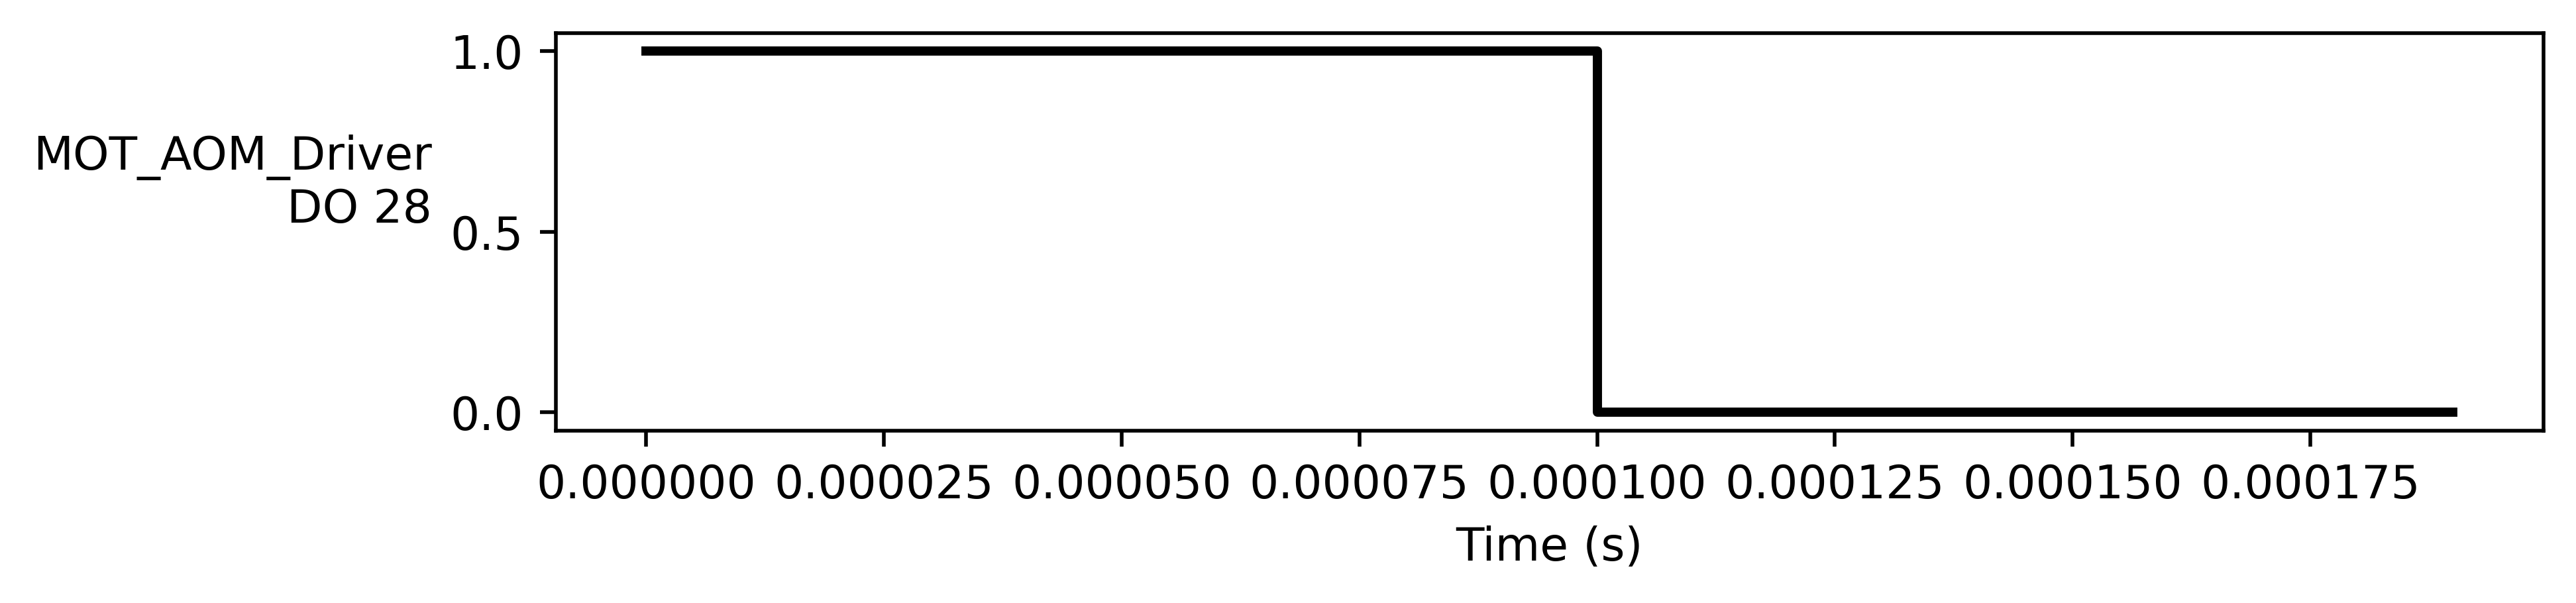

In [11]:
MOT_master.plot()

In [12]:
#6.2 Let's make other sequences
MOT_master.create_slave(types="DO", name="MOT_MEMS_Switch", ch=20)
MOT_master["MOT_MEMS_Switch"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="AH_Coil_Driver", ch=22)
MOT_master["AH_Coil_Driver"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="Camera_trigger", ch=2)
MOT_master["Camera_trigger"].pattern.update("0" * 9 + "10" *5 + "0")

MOT_master.create_slave(types="DO", name="UV_LED", ch=24)
MOT_master["UV_LED"].pattern.update("1" * 10 + "0" * 10)

MOT_master.create_slave(types="DO", name="Arb-1", ch=26)
MOT_master["Arb-1"].pattern.update(("10") * 10)

# MOT_master.create_slave(types="DO", name="Arb-2", ch=6)
# MOT_master["Arb-2"].pattern.update("01" + "001" + "0001" + "00001" + "001000")

# MOT_master.create_slave(types="DO", name="Arb-3", ch=7)
# MOT_master["Arb-3"].pattern.update("01101010010110001010")

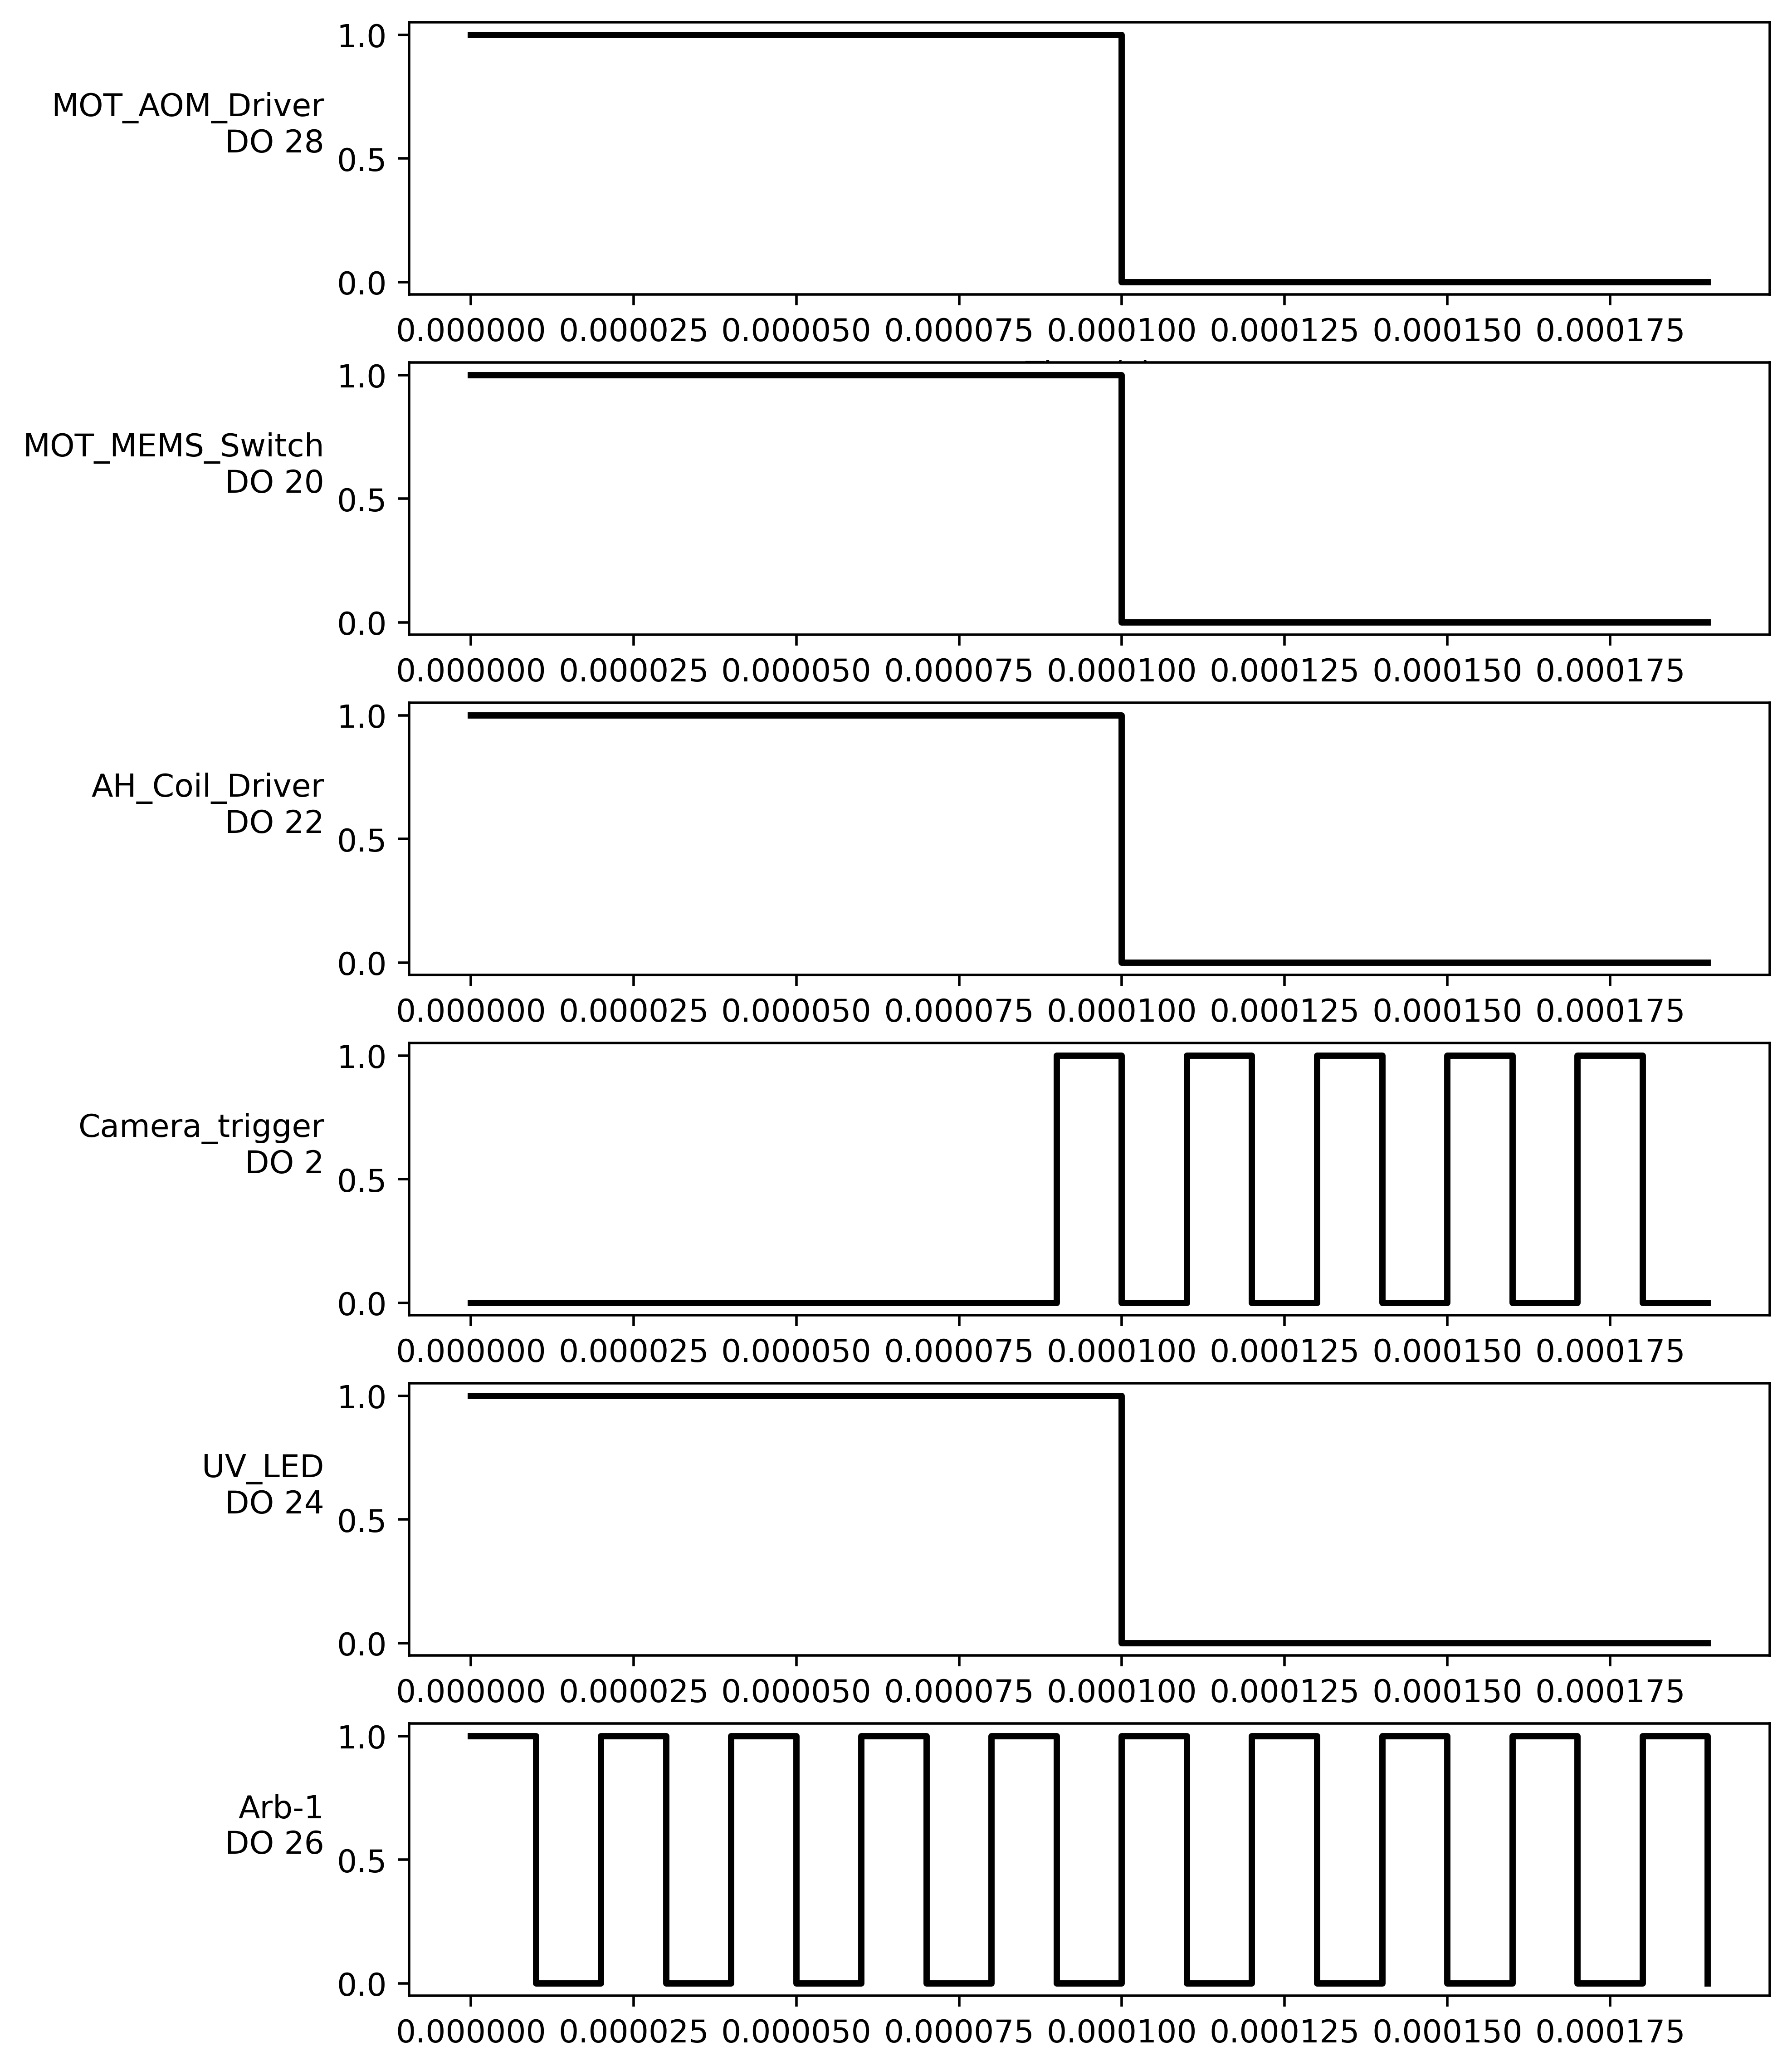

In [13]:
# 6.3 Let's Plot our Master sequence to see what we have done
MOT_master.plot()

In [14]:
experiment_manager["Digital Output Examples"].append(MOT_master)

In [15]:
experiment_manager["Digital Output Examples"][0]

{'DO': <OQtrl.c_long_Array_40 at 0x16c3adf4b50>,
 'AO': None,
 'DI': None,
 'AI': None}

In [16]:
np.array(experiment_manager["Digital Output Examples"][0]['DO'])

array([357564416,      1000, 290455552,      1000, 357564416,      1000,
       290455552,      1000, 357564416,      1000, 290455552,      1000,
       357564416,      1000, 290455552,      1000, 357564416,      1000,
       290455556,      1000,  67108864,      1000,         4,      1000,
        67108864,      1000,         4,      1000,  67108864,      1000,
               4,      1000,  67108864,      1000,         4,      1000,
        67108864,      1000,         0,      1000])

In [17]:
experiment_manager.start(project='Digital Output Examples')

In [18]:
experiment_manager.show_params_status(number=32,all=False)

'DO_FIFO_WRITE_COUNT:20'

In [19]:
experiment_manager.show_params_status()

{'DIO_CH_CONFIG': 15,
 'DO_FIFO_CH_PATTERN': 357564420,
 'DO_FIFO_WRITE_COUNT': 20,
 'DO_FIFO_WRITE_STARTING_INDEX': 1,
 'AI_AVG_MODE': 0,
 'AI_BURST_CHANNELS': 255,
 'AI_BURST_BUFFER_SIZE': 20000,
 'AI_BURST_CLOCK_RATE': 25,
 'AI_BURST_TRIGGER_MODE': 2,
 'AO_UPDATE_PERIOD': 3000}

In [20]:
experiment_manager.show_adwin_status()

1

In [21]:
experiment_manager.process_delay

99

In [22]:
experiment_manager.stop()

In [23]:
experiment_manager.show_adwin_status()

0